In [4]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from arch.unitroot import ADF
import statsmodels.tsa.api as smt
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
data = pd.read_excel('/Users/alexcappadona/Downloads/Nordstrom2019.xlsx', index_col=0)
data.head()

,fyearq,fqtr,tic,conm,datacqtr,niq,revtq
datadate,,,,,,,
1973-04-30,1973,1,JWN,NORDSTROM INC,1973Q1,0.985,20.490
1973-07-31,1973,2,JWN,NORDSTROM INC,1973Q2,0.793,24.250
1973-10-31,1973,3,JWN,NORDSTROM INC,1973Q3,1.516,26.424
1974-01-31,1973,4,JWN,NORDSTROM INC,1973Q4,1.078,30.270
1974-04-30,1974,1,JWN,NORDSTROM INC,1974Q1,1.035,23.650


In [3]:
data.tail()

,fyearq,fqtr,tic,conm,datacqtr,niq,revtq
datadate,,,,,,,
2019-01-31,2018,4,JWN,NORDSTROM INC,2018Q4,248.0,4483.0
2019-04-30,2019,1,JWN,NORDSTROM INC,2019Q1,37.0,3443.0
2019-07-31,2019,2,JWN,NORDSTROM INC,2019Q2,140.0,3872.0
2019-10-31,2019,3,JWN,NORDSTROM INC,2019Q3,127.0,3672.0
2020-01-31,2019,4,JWN,NORDSTROM INC,2019Q4,192.0,4537.0


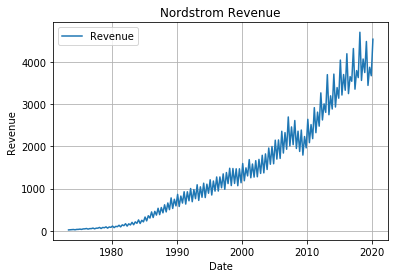

In [4]:
plt.figure(1)
plt.plot(data['revtq'], label='Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Nordstrom Revenue')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
data['LogRev']=np.log(data['revtq']) #compute log return of revenue
data['dLogRev']=(data['LogRev']).diff()
data=data.dropna()
data.head()

,fyearq,fqtr,tic,conm,datacqtr,niq,revtq,LogRev,dLogRev
datadate,,,,,,,,,
1974-01-31,1973,4,JWN,NORDSTROM INC,1973Q4,1.078,30.270,3.410157,0.135884
1974-04-30,1974,1,JWN,NORDSTROM INC,1974Q1,1.035,23.650,3.163363,-0.246794
1974-07-31,1974,2,JWN,NORDSTROM INC,1974Q2,0.983,32.619,3.484895,0.321532
1974-10-31,1974,3,JWN,NORDSTROM INC,1974Q3,1.731,33.067,3.498536,0.013641
1975-01-31,1974,4,JWN,NORDSTROM INC,1974Q4,1.416,39.432,3.674578,0.176042


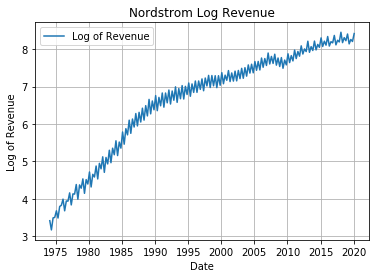

In [17]:
plt.figure(2)
plt.plot(data['LogRev'], label='Log of Revenue')
plt.xlabel('Date')
plt.ylabel('Log of Revenue')
plt.title('Nordstrom Log Revenue')
plt.grid(True)
plt.legend()
plt.show()

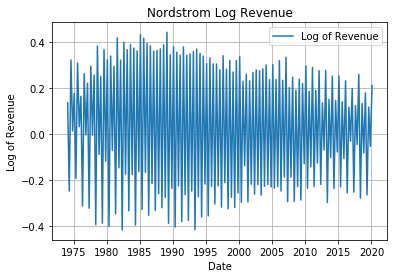

In [19]:
plt.figure(2)
plt.plot(data['dLogRev'], label='Log of Revenue')
plt.xlabel('Date')
plt.ylabel('Log of Revenue')
plt.title('Nordstrom Log Revenue')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
res = ADF(data['LogRev'], trend="ct", lags=4) # trend="ct" --> means include constant and linear trend
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.788
P-value                         0.711
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.44 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [25]:
res = ADF(data['dLogRev'], trend="ct", lags=4) # trend="ct" --> means include constant and linear trend
print(res.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.150
P-value                         0.005
Lags                                4
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.01 (1%), -3.44 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [30]:
model = smt.arima.ARIMA(data['dLogRev'], trend="ct", order=(8,0,0)) #part 1.c of project
results = model.fit()
print(results.summary())
residuals = results.resid

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                dLogRev   No. Observations:                  185
Model:                 ARIMA(8, 0, 0)   Log Likelihood                 349.188
Date:                Mon, 29 Nov 2021   AIC                           -676.375
Time:                        14:32:37   BIC                           -640.952
Sample:                    01-31-1974   HQIC                          -662.019
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0530      0.006      9.635      0.000       0.042       0.064
x1            -0.0003    5.7e-05     -4.962      0.000      -0.000      -0.000
ar.L1         -0.2268      0.066     -3.451      0.0

In [31]:
residuals.head()

datadate
1974-01-31    0.083167
1974-04-30   -0.220211
1974-07-31    0.002112
1974-10-31    0.063939
1975-01-31    0.038542
dtype: float64

In [32]:
#Ljung-Box test
name = ['Ljung-Box statistic', 'p-value']       #name
test=sms.acorr_ljungbox(residuals, lags=4)      #test
lzip(name, test)

# this is not right:

[('Ljung-Box statistic', 'lb_stat'), ('p-value', 'lb_pvalue')]

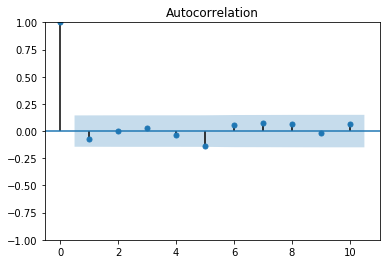

In [33]:
smt.graphics.plot_acf(residuals, lags=10)
plt.show()

In [34]:
data.tail()

,fyearq,fqtr,tic,conm,datacqtr,niq,revtq,LogRev,dLogRev
datadate,,,,,,,,,
2019-01-31,2018,4,JWN,NORDSTROM INC,2018Q4,248.0,4483.0,8.408048,0.179070
2019-04-30,2019,1,JWN,NORDSTROM INC,2019Q1,37.0,3443.0,8.144098,-0.263949
2019-07-31,2019,2,JWN,NORDSTROM INC,2019Q2,140.0,3872.0,8.261526,0.117428
2019-10-31,2019,3,JWN,NORDSTROM INC,2019Q3,127.0,3672.0,8.208492,-0.053035
2020-01-31,2019,4,JWN,NORDSTROM INC,2019Q4,192.0,4537.0,8.420021,0.211530


In [35]:
data_insample = data['1973-07-31':'2019-01-31']
data_insample.tail()

,fyearq,fqtr,tic,conm,datacqtr,niq,revtq,LogRev,dLogRev
datadate,,,,,,,,,
2018-01-31,2017,4,JWN,NORDSTROM INC,2017Q4,151.0,4702.0,8.455743,0.259306
2018-04-30,2018,1,JWN,NORDSTROM INC,2018Q1,87.0,3561.0,8.177797,-0.277947
2018-07-31,2018,2,JWN,NORDSTROM INC,2018Q2,162.0,4068.0,8.310907,0.133110
2018-10-31,2018,3,JWN,NORDSTROM INC,2018Q3,67.0,3748.0,8.228978,-0.081929
2019-01-31,2018,4,JWN,NORDSTROM INC,2018Q4,248.0,4483.0,8.408048,0.179070


In [38]:
model = smt.arima.ARIMA(data['dLogRev'], trend="ct", order=(8,0,0)) #part 1.c of project
results = model.fit()
print(results.summary())
# Make forecast:
results.predict('2019-04-31','2020-01-31', dynamic=False)

#this is also not right; no predictions provided
# predictions are what are put into excel to do forecasting

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                dLogRev   No. Observations:                  185
Model:                 ARIMA(8, 0, 0)   Log Likelihood                 349.188
Date:                Mon, 29 Nov 2021   AIC                           -676.375
Time:                        14:51:35   BIC                           -640.952
Sample:                    01-31-1974   HQIC                          -662.019
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0530      0.006      9.635      0.000       0.042       0.064
x1            -0.0003    5.7e-05     -4.962      0.000      -0.000      -0.000
ar.L1         -0.2268      0.066     -3.451      0.0

ValueError: could not convert string to Timestamp